    📚공부 자료
        ✔0_velog 안영우님 "이것이 코딩테스트다" 시리즈
        ✔나동빈님 "이것이 코딩테스트다" 강의

# **🥞 15. 최단 경로(Shortest path)**
----
말 그대로 가장 짧은 경로를 찾는 알고리즘. 길 찾기 문제로 자주 출제되기도 한다.   
최단 경로 알고리즘 유형은 다양한 종류가 있다.
- 한 지점에서 다른 특정 지점까지의 최단 경로를 구해야 하는 경우
- 한 지점에서 다른 모든 지점까지의 최단 경로를 구해야 하는 경우
- 모든 지점에서 다른 모든 지점까지의 최단 경로를 구해야 하는 경우
등   

최단 경로 알고리즘은 **유형 별로 가장 효율적인 알고리즘이 존재**한다.   

코딩 테스트에서는 최단 경로를 모두 출력하는 문제보다는, 단순히 **최단 거리를 구해 출력하는 문제**가 많이 출제됨을 알아둘 것!    

많이 사용되는 최단 거리 알고리즘으로는 다익스트라, 플로이드 워셜 벨만 포드 알고리즘 정도다. 이코테에서는 **다익스트라**, **플로이드 워셜** 알고리즘을 다룬다.

기본적으로 길 찾기 문제는 다이나믹 프로그래밍 문제가 적용 된다.    
a에서 c까지 갈 때, a에서 b로, b에서 c로 가는 것을 모두 생각해야 하기 때문     

**각 지점**은 **노드**로 표현, 지점간 **연결된 도로**는 그래프에서 **간선**으로 표현.    
노드는 국가, 지역 등 문제에서 다양하게 정의될 수 있다.   
간선은 도로나 통로 등으로 표현되곤 한다.   

## **🍞 Dijkstra Algorithm**

특정한 노드에서 출발하여 **다른 모든 노드**로 가는 **최단 경로를 계산**.    

**음의 간선이 없을 때** 정상적으로 동작.   
👉 현실 세계의 도로는 음의 간선으로 표현되지 않긴 함    
👉 **현실 길찾기 문제**에 사용될 수 있다   
<br>

다익스트라는 매 상황에서 방문하지 않은 노드 중 가장 비용이 적은 노드를 선택해 임의의 과정을 반복하기 때문에, **그리디 알고리즘**으로 분류됨.

### 🧁 **동작 과정**
>1. 출발 노드 설정
>2. 최단 거리 테이블 초기화
처음에는 기본적으로 모든 노드까지 가기 위한 비용을 무한으로 설정.
자기 자신에 대한 비용은 0(자기자신에서 자기 자신으로 가는 비용)
>3. 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드 선택   
    - 이런 과정 때문에 이를 그리디 알고리즘으로 볼 수 있다.   
그리디 알고리즘으로 문제를 해결할 수 있는 이유는 3번 과정을 반복 할 때 마다 **선택된 노드까지의 최단 거리는 더 이상 바뀌지 않기 때문**.   
한 단계 당 하나의 노드에 대한 최단 거리를 확실히 찾는 것으로 이해할 수 있다.   
즉, **출발 노드로 부터 다른 모든 노드까지의 최단 거리를 구하는 것과 같다.**   
완벽한 형태의 최단 경로까지 구하는 것은 별도의 로직이 더 필요한데, 그걸 일반적인 코테에서 잘 물어보지 않기 때문에 최단 거리까지 구하는 것을 목표로 한다.
4. 해당 노드를 거쳐 다른 노드로 가는 비용을 계산하여, 최단 거리 테이블을 갱신
5. 위 과정에서 3, 4번을 반복

<br>

### 🧁 **간단한 구현 방법**

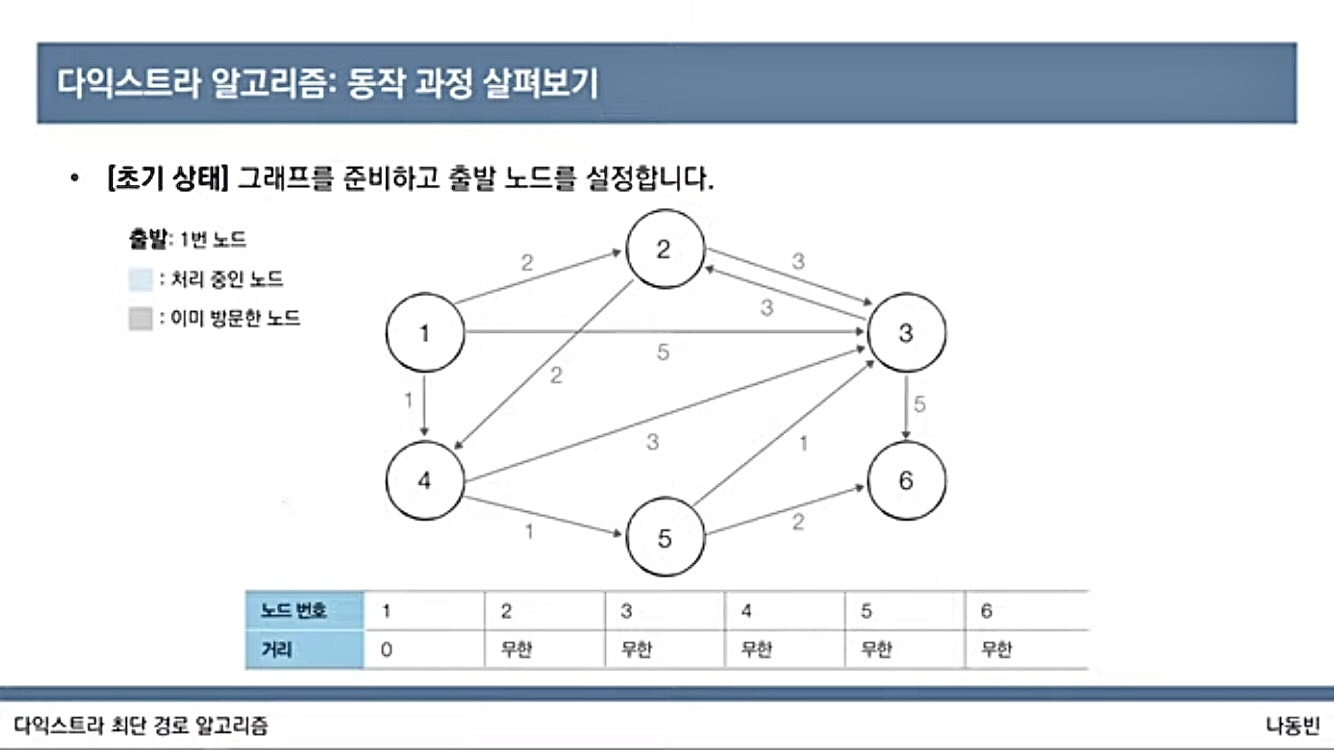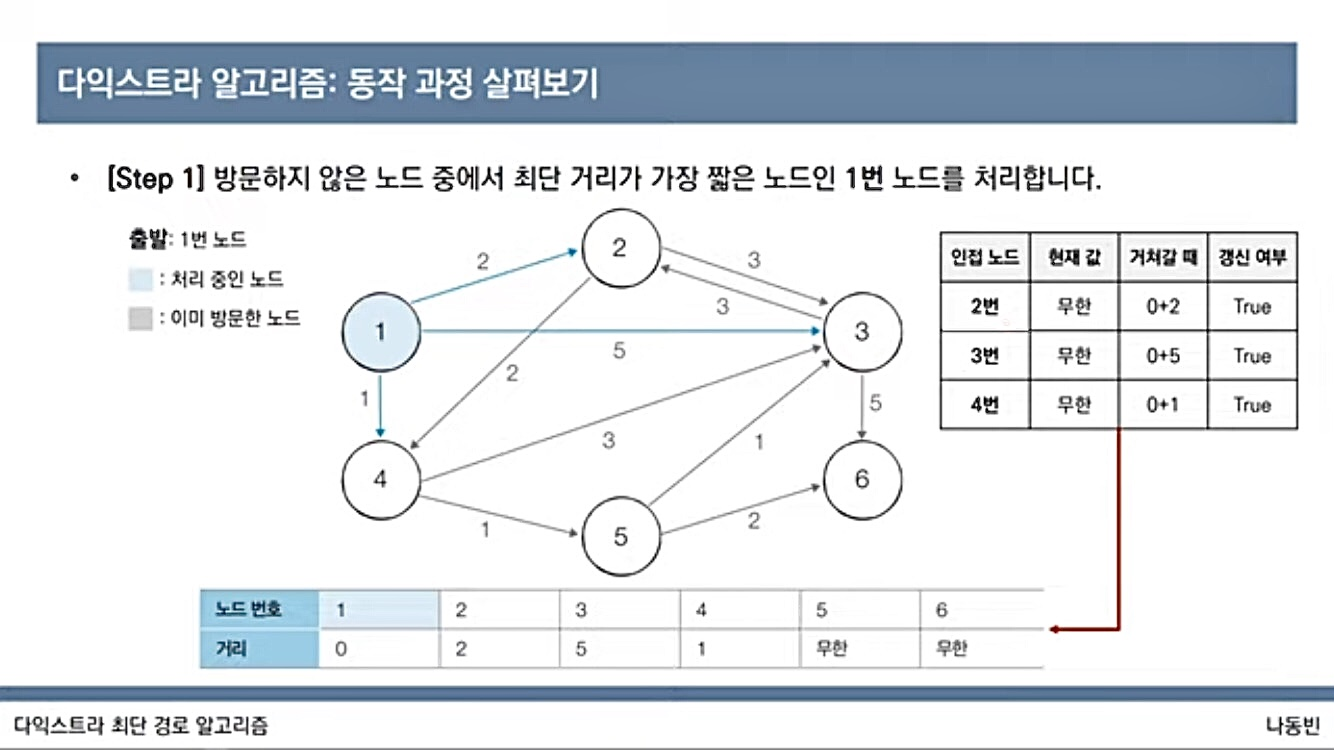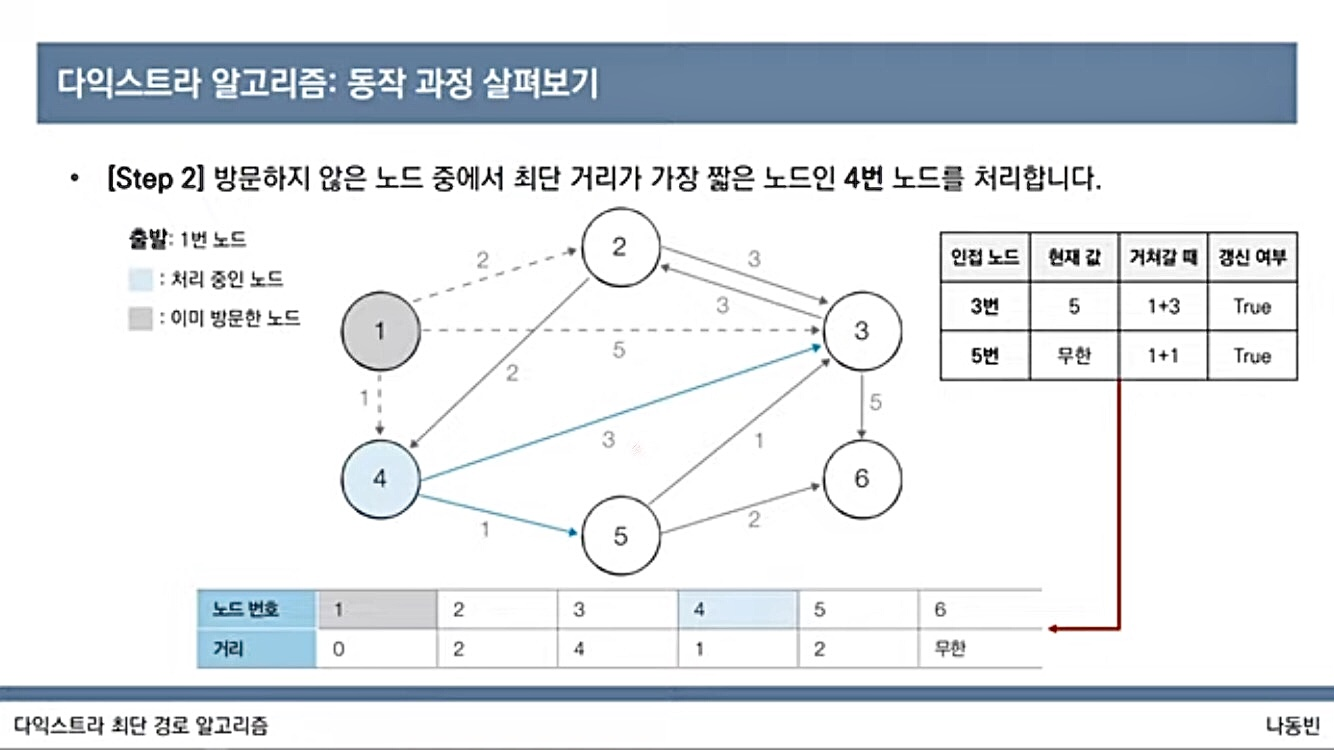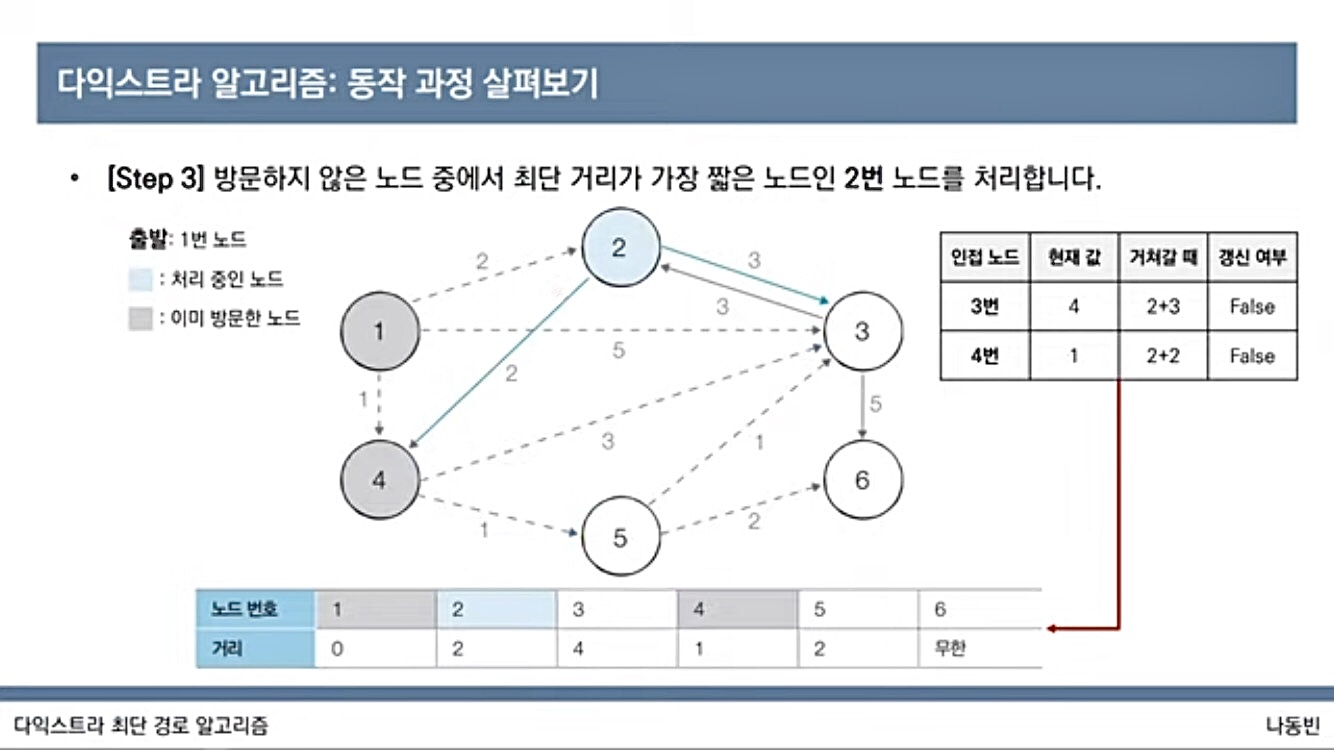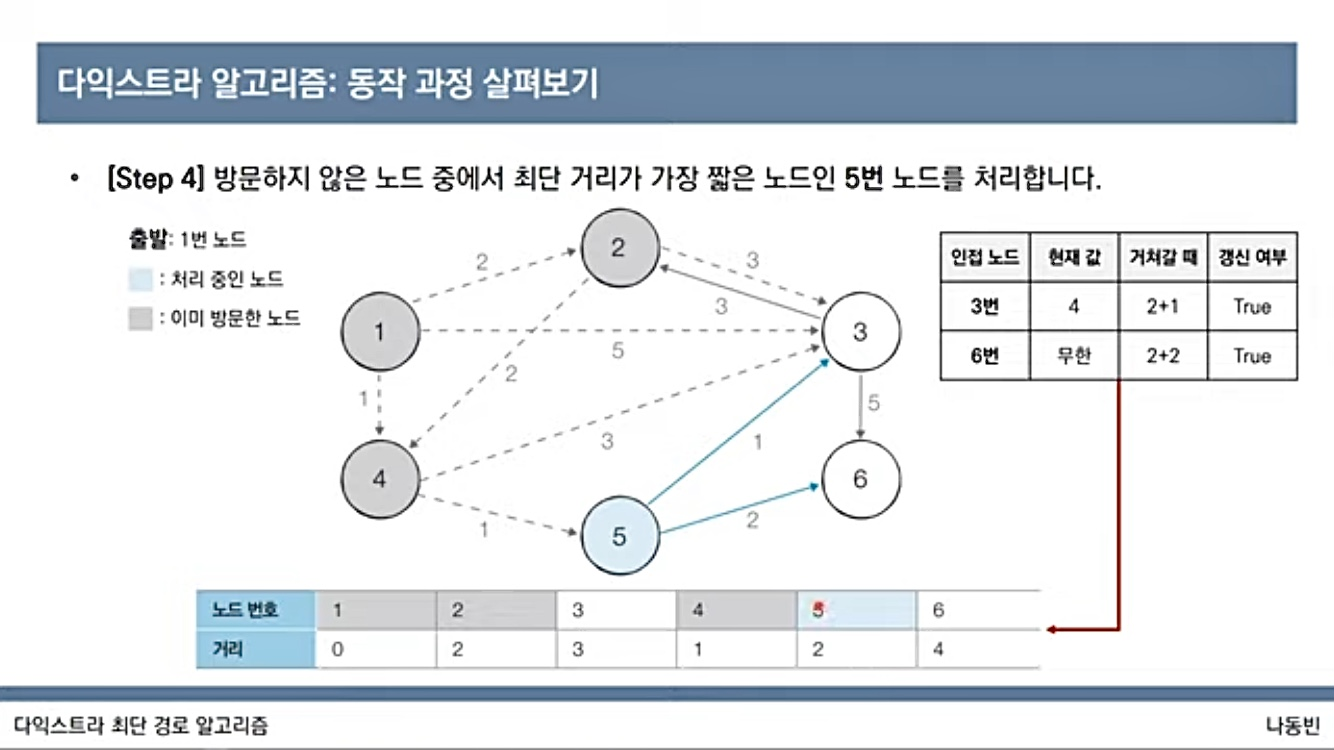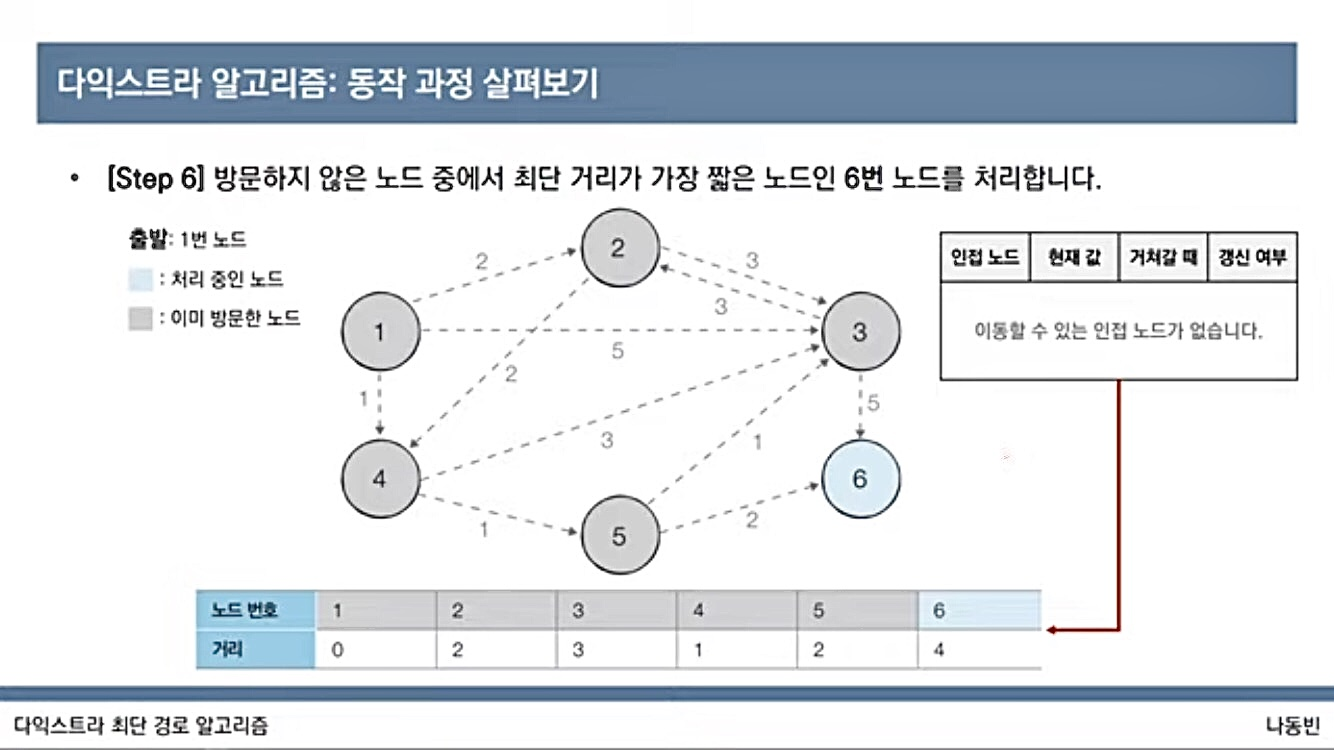

In [ ]:
#import sys
#input = sys.stdin.readline()
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 시작 노드 번호 입력 받기
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n+1)]
# 방문한 적이 있는지 체크하는 목적의 리스트를 만들기
visited = [False] * (n+1)
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n+1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    a, b, c = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b, c))

# 방문하지 않는 노드 중에서, 가장 최단 거리가 짧은 노드의 번호를 반환
def get_smallest_node():
    min_value = INF
    index = 0 #가장 최단 거리가 짧은 노드(인덱스)
    for i in range(1, n+1):
        if distance[i] < min_value and not visited[i]:
            min_value = distance[i]
            index = i
    return index

def dijkstra(start):
    # 시작 노드에 대해 초기화
    distance[start] = 0
    visited[start] = True
    for j in graph[start]:
        distance[j[0]] = j[1]
    #시작 노드를 제외한 전체 n-1개의 노드에 대해 반복
    for i in range(n-1):
        # 현재 최단 거리가 가장 짧은 노드를 꺼내서 방문 처리
        now = get_smallest_node()
        visited[now] = True
        # 현재 노드와 연결된 다른 노드를 확인
        for j in graph[now]:
            cost = distance[now] + j[1]
            # 현재 노드를 거쳐서 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[j[0]]:
                distance[j[0]] = cost

dijkstra(start)

#모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n+1):
    # 도달할 수 없는 경우, 무한이라고 출력
    if distance[i] == INF:
        print("INFINITY")
    else:
        print(distance[i])



6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2
0
2
3
1
2
4


노드 수가 V라고 할 때, 총 O(V)번에 걸쳐 최단 거리가 가장짧은 노드를 매번 선형 탐색해야 함. 따라서, 전체 시간 복잡도는 O(V²).    

전체 노드의 개수가 5000개 이하면 이 코드로 문제 풀 수 있는데, 만약 5000개가 넘어가면 풀기 쉽지 않다.   
<br>

### 🧁 **개선된 구현 방법 - 우선순위 큐 사용**

#### 🥯 **우선순위 큐란?**

**우선순위가 가장 높은 데이터를 먼저 삭제**하는 자료구조.  

여러 물건을 넣었다가 가치가 가장 높은 놈부터 꺼낸다던가 이런 문제에 이용할 수 있다.     

Python, C++, JAVA를 포함한 대부분의 프로그래밍 언어에서 표준 라이브러리 형태로 지원한다.   
</br>

#### 🥯 **우선순위 큐를 구현하는데 사용되는 힙(Heap)**

힙은 우선순위 큐 구현에 사용되는 자료구조 중 하나로, 값이 낮은 데이터부터 꺼내는 **최소힙(Min Heap)**, 값이 큰 데이터부터 꺼내는 **최대힙(Max Heap)**이 있다.

리스트는 삽입 시간이 O(1)이지만 삭제 시간은 O(N)인데 반해, 힙은 트리구조로 구현된 자료구조기 때문에 **삽입, 삭제시간 모두 O(logN)이 걸린다.** 때문에 다익스트라를 포함해 다양한 알고리즘에서 사용된다.   
<br>

#### 🥯 **힙 라이브러리 사용 예제**


In [ ]:
import heapq # 기본이 min heap

# 오름차순 힙 정렬
def heapsort(iterable):
    h = []
    result = []
    # 모든 원소를 차례대로 힙에 삽입
    for value in iterable:
        heapq.heappush(h, value)
    # 모든 원소를 차례대로 꺼내 담기
    for i in range(len(h)):
        result.append(heapq.heappop(h))
    return result

result = heapsort([1, 3, 5, 7, 9, 2, 4, 6, 8, 0])
print(result)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
import heapq # 기본이 min heap

# 내림차순 힙 정렬
def heapsort(iterable):
    h = []
    result = []
    # 모든 원소를 차례대로 힙에 삽입
    for value in iterable:
        heapq.heappush(h, -value)
    # 모든 원소를 차례대로 꺼내 담기
    for i in range(len(h)):
        result.append(-heapq.heappop(h))
    return result

result = heapsort([1, 3, 5, 7, 9, 2, 4, 6, 8, 0])
print(result)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


#### 🥯 **개선된 구현 방법**

단계마다 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택하기 위해 힙 사용. 기본 원리는 동일.    
최단 거리가 가장 짧은 노드를 사용해야 하므로, 최소힙을 사용.

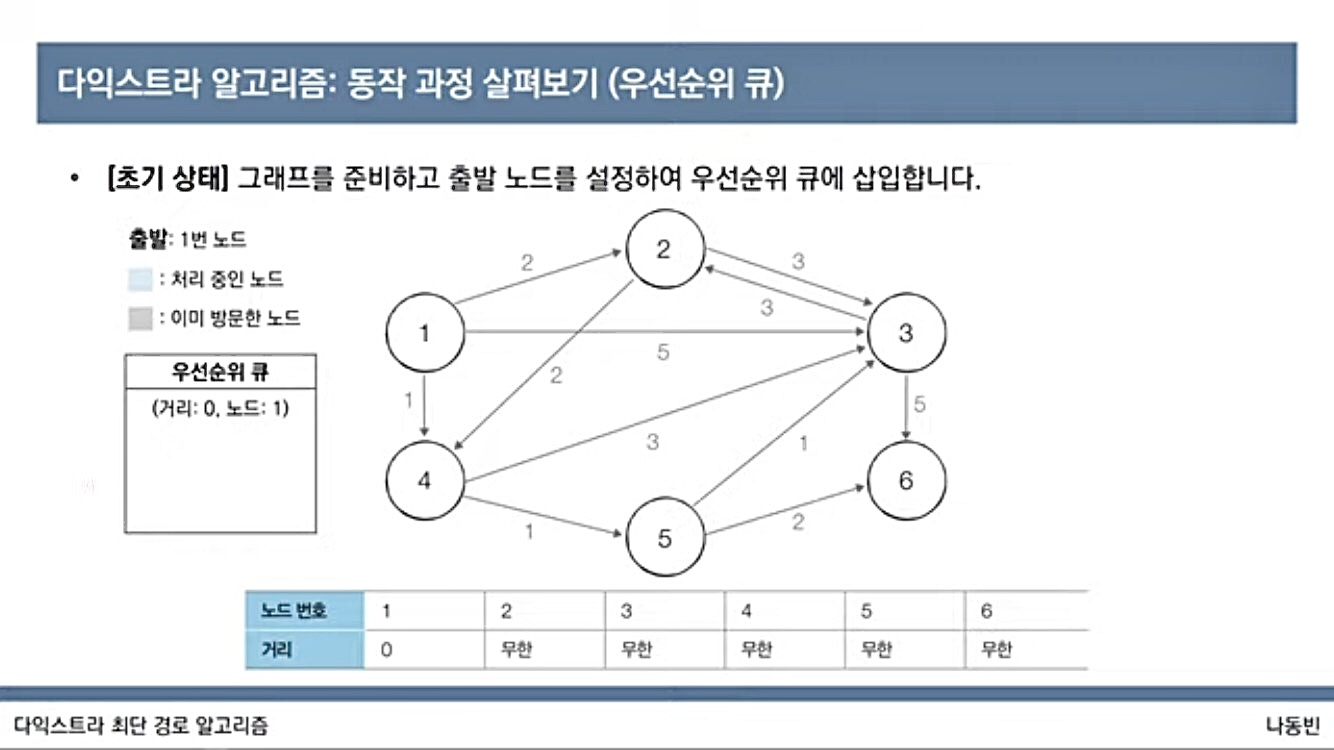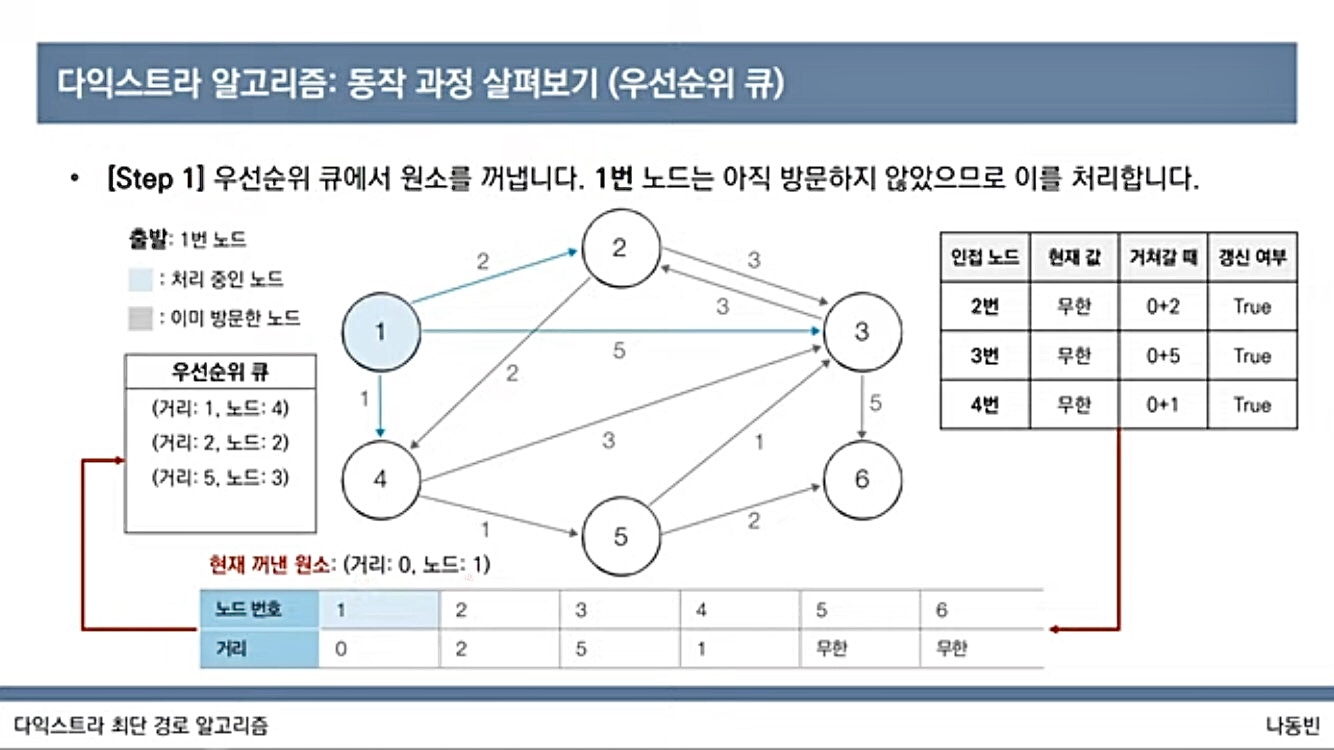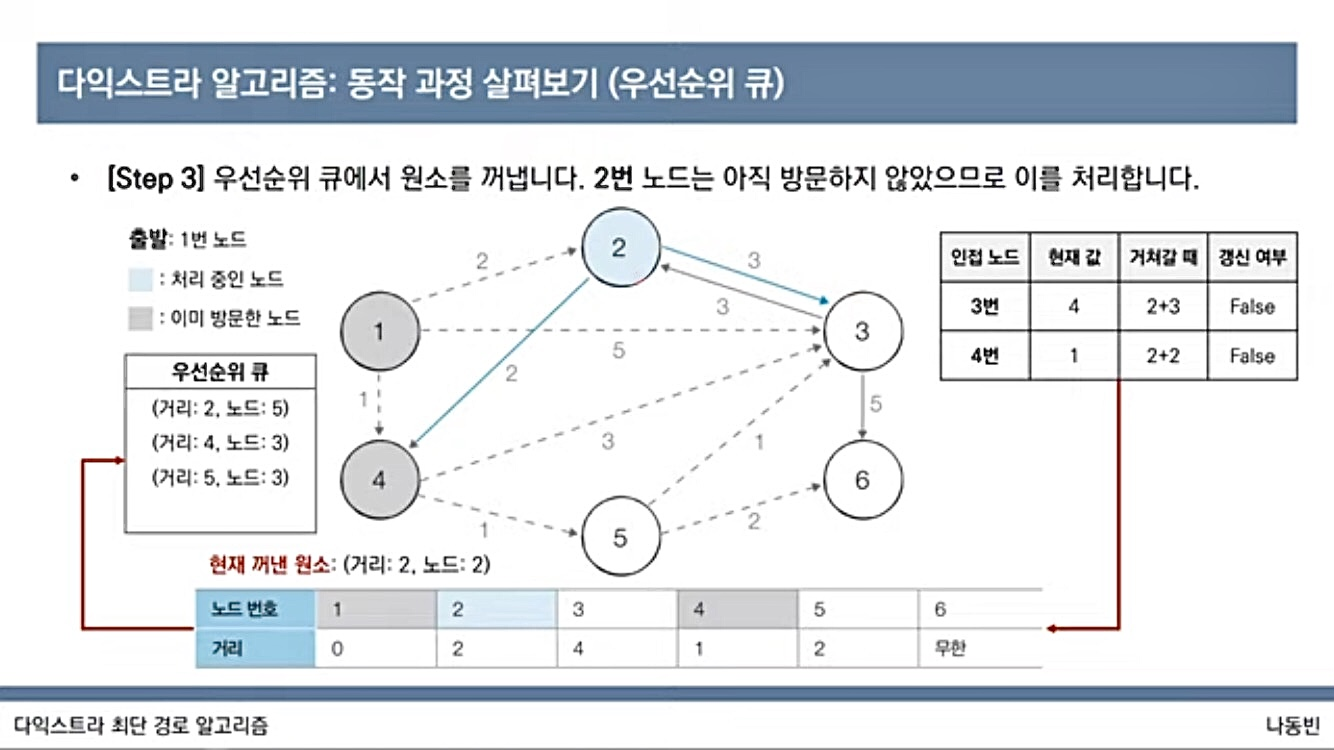

In [ ]:
import heapq
#import sys
#input = sys.stdin.readline()

INF = int(1e9)

n,m = map(int, input().split())
start = int(input())
graph = [[] for _ in range(n+1)]
distance = [INF] * (n+1)

for i in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b, c))

def dijkstra(start):
    q = []
    heapq.heappush(q, (0, start))
    distance[start] = 0

    while q:
        dist, now = heapq.heappop(q)
        if distance[now] < dist:
            continue # distance[now]보다 크면 어차피 pop만 되고 값은 변하지 않음

        for i in graph[now]:
            cost = dist + i[1]
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))
            print(q)


dijkstra(start)

#모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n+1):
    # 도달할 수 없는 경우, 무한이라고 출력
    if distance[i] == INF:
        print("INFINITY")
    else:
        print(distance[i])

6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2
[(2, 2)]
[(2, 2), (5, 3)]
[(1, 4), (5, 3), (2, 2)]
[(2, 2), (5, 3), (4, 3)]
[(2, 2), (2, 5), (4, 3), (5, 3)]
[(2, 5), (5, 3), (4, 3)]
[(2, 5), (5, 3), (4, 3)]
[(3, 3), (5, 3), (4, 3)]
[(3, 3), (4, 6), (4, 3), (5, 3)]
[(4, 3), (4, 6), (5, 3)]
[(4, 3), (4, 6), (5, 3)]
0
2
3
1
2
4


#### 🥯 **시간 복잡도**

힙 자료구조를 이용하는 다익스트라 알고리즘의 시간 복잡도는 **O(ElogV)**.

힙을 사용하기 때문에 시간복잡도는 logN의 형태를 가짐.  

노드를 하나씩 꺼내 검사하는 반복문은 노드 개수 V 이상의 횟수로는 처리되지 않음. (logV)    
결과적으로, 현재 우선순위 큐에서 꺼낸 노드와 연결된 다른 노드들을  확인하는 총 횟수는 최대 간선의 개수(E)만큼 연산이 수행됨. (ElogV)     

직관적으로 전체 과정은 E개의 원소를 우선순위 큐에 넣었다가 모두 빼내는 연산과 매우 유사하며, O(ElogE)라고 할 수 있음.     
중복 간선을 포함하지 않는 경우에 이를 O(ElogV)로 정리할 수 있음.

$O\left(E\log E\right)\to O\left(E\log V^2\right)\to O\left(2E\log V\right)\to O\left(E\log V\right)$

#### **백준 문제 1504번**: 특정한 최단 경로

In [ ]:
'''
 이 문제에서는 2가지의 경로에 대해 다 생각해 봐야 한다.
  1. v1을 먼저 들르고 v2를 가는 방법
    start -> v1 -> v2 -> end
  2. v2를 먼저 찍고 v1을 가는 방법
    start -> v2 -> v1 -> end

 가는 경로의 구간 마다 다익스트라로 최단 경로를 찾아서, 각각 더해줘서 최종 최단 경로를 찾아야 한다.
 이후, 위에서 구한 2가지 경로 중 작은 값이 최종 정답이 된다.
'''

import heapq
import sys
#input = sys.stdin.readline()
INF = 1e9

N, E = map(int, input().split())
graph = [[] for _ in range (N+1)]

for i in range(E):
    a, b, c = map(int, input().split()) # 양방향 길이다
    graph[a].append((c, b))
    graph[b].append((c, a))

v1, v2 = map(int, input().split())
def dijkstra (start, end):
    distance = [INF] * (N+1) # start의 값이 바뀌니까, distance도 다시 초기화 시켜줘야 값이 제대로 나온다.
    q=[]
    heapq.heappush(q, (0, start))
    distance[start]=0
    while q:
        dist, now = heapq.heappop(q)
        if dist > distance[now]:
            continue
        for item in graph[now]:
            cost = item[0] + dist
            if cost < distance[item[1]]:
                distance[item[1]] = cost
                heapq.heappush(q, (cost, item[1]))
    return distance[end]

# 어떻게 하면 end값에서 딱 멈출 수 있을까 고민을 많이 했는데, 그냥 다익스트라 다 돌리면 최단 경로가 구해질 거니까
# 구해진 최단 경로 distance의 end번째 값을 가져오면 될 문제였다...
sum=min((dijkstra(1, v1)+dijkstra(v1, v2)+dijkstra(v2, N)), (dijkstra(1, v2)+dijkstra(v1, v2)+dijkstra(v1, N)))
if sum < INF:
    print(sum)
else:
    print(-1)

4 5
1 2 2
1 3 4
2 3 1
2 4 5
3 4 7
2 3
9


In [ ]:
import heapq

INF = int(1e9)
N,M,C = map(int,input().split())
distance = [INF]*(N+1)
graph = [[] for _ in range (N+1)]

def djikstra(start):
    q=[]
    distance[start] = 0
    heapq.heappush(q, (0, start))

    while q:
        dist, now = heapq.heappop(q)
        if dist > distance[now]:
            continue
        for item in graph[now]:
            cost = dist+item[0]
            if cost < distance[item[1]]:
                distance[item[1]] = cost
                heapq.heappush(q, (cost, item[1]))

def find_country():
    country = N-1
    for i in range(1, N+1):
        if distance[i] >= INF:
            country-=1
    return country


for _ in range(M):
    x, y, z = map(int,input().split())
    graph[x].append((z, y))

djikstra(C)
count = find_country()
print(count, max(distance[1:]))

3 2 1
1 2 4
1 3 2
2 4


## **🍞 Floyd-Warshall Algorithm**
모든 노드에서 다른 모든 노드까지의 **최단 경로를 모두 계산**하는 알고리즘.     

플로이드 워셜 알고리즘은 다익스트라와 마찬가지로, 단계별로 거쳐가는 노드를 기준으로 알고리즘을 수행한다.    
- 다만, 최단 경로를 모두 계산하기 때문에 매 단계마다 방문하지 않은 노드 중 최단 거리를 갖는 노드를 찾는 과정이 필요하지 않다.

플로이드 워셜은 **2차원 테이블**에 최단 거리 정보를 저장하는데, **점화식에 맞게 3중 반복문을 이용해 2차원 테이블을 갱신**해주는 방법으로 동작한다.   
이렇게 2차원 테이블에 저장된 값을 점화식에 따라서 갱신한다는 점에서 **다이나믹 프로그래밍 유형에 속한다.**   

구현 난이도는 다익스트라에 비해 쉬운 편이나, 시간 복잡도는 **O(n³).**    

**노드의 개수가 적은 문제에서 효과적**으로 사용 가능, 그렇지 않다면 일반적으로 다익스트라를 사용해야 한다.
실제로 플로이드 워셜 문제는 노드가 500개 이하인 문제가 많다.

### **🧁 점화식**
각 단계마다 특정한 노드 k를 거쳐 가는 경우를 확인한다.
- a에서 b로 가는 최단 거리보다, a에서 k를 거쳐 b로 가는 경우가 더 짧은지 확인.

$$D_{𝛂𝒃} = min(D_{𝛂𝒃}, D_{𝛂𝒌} + D_{𝛂𝒃})$$

### **🧁 동작 과정**


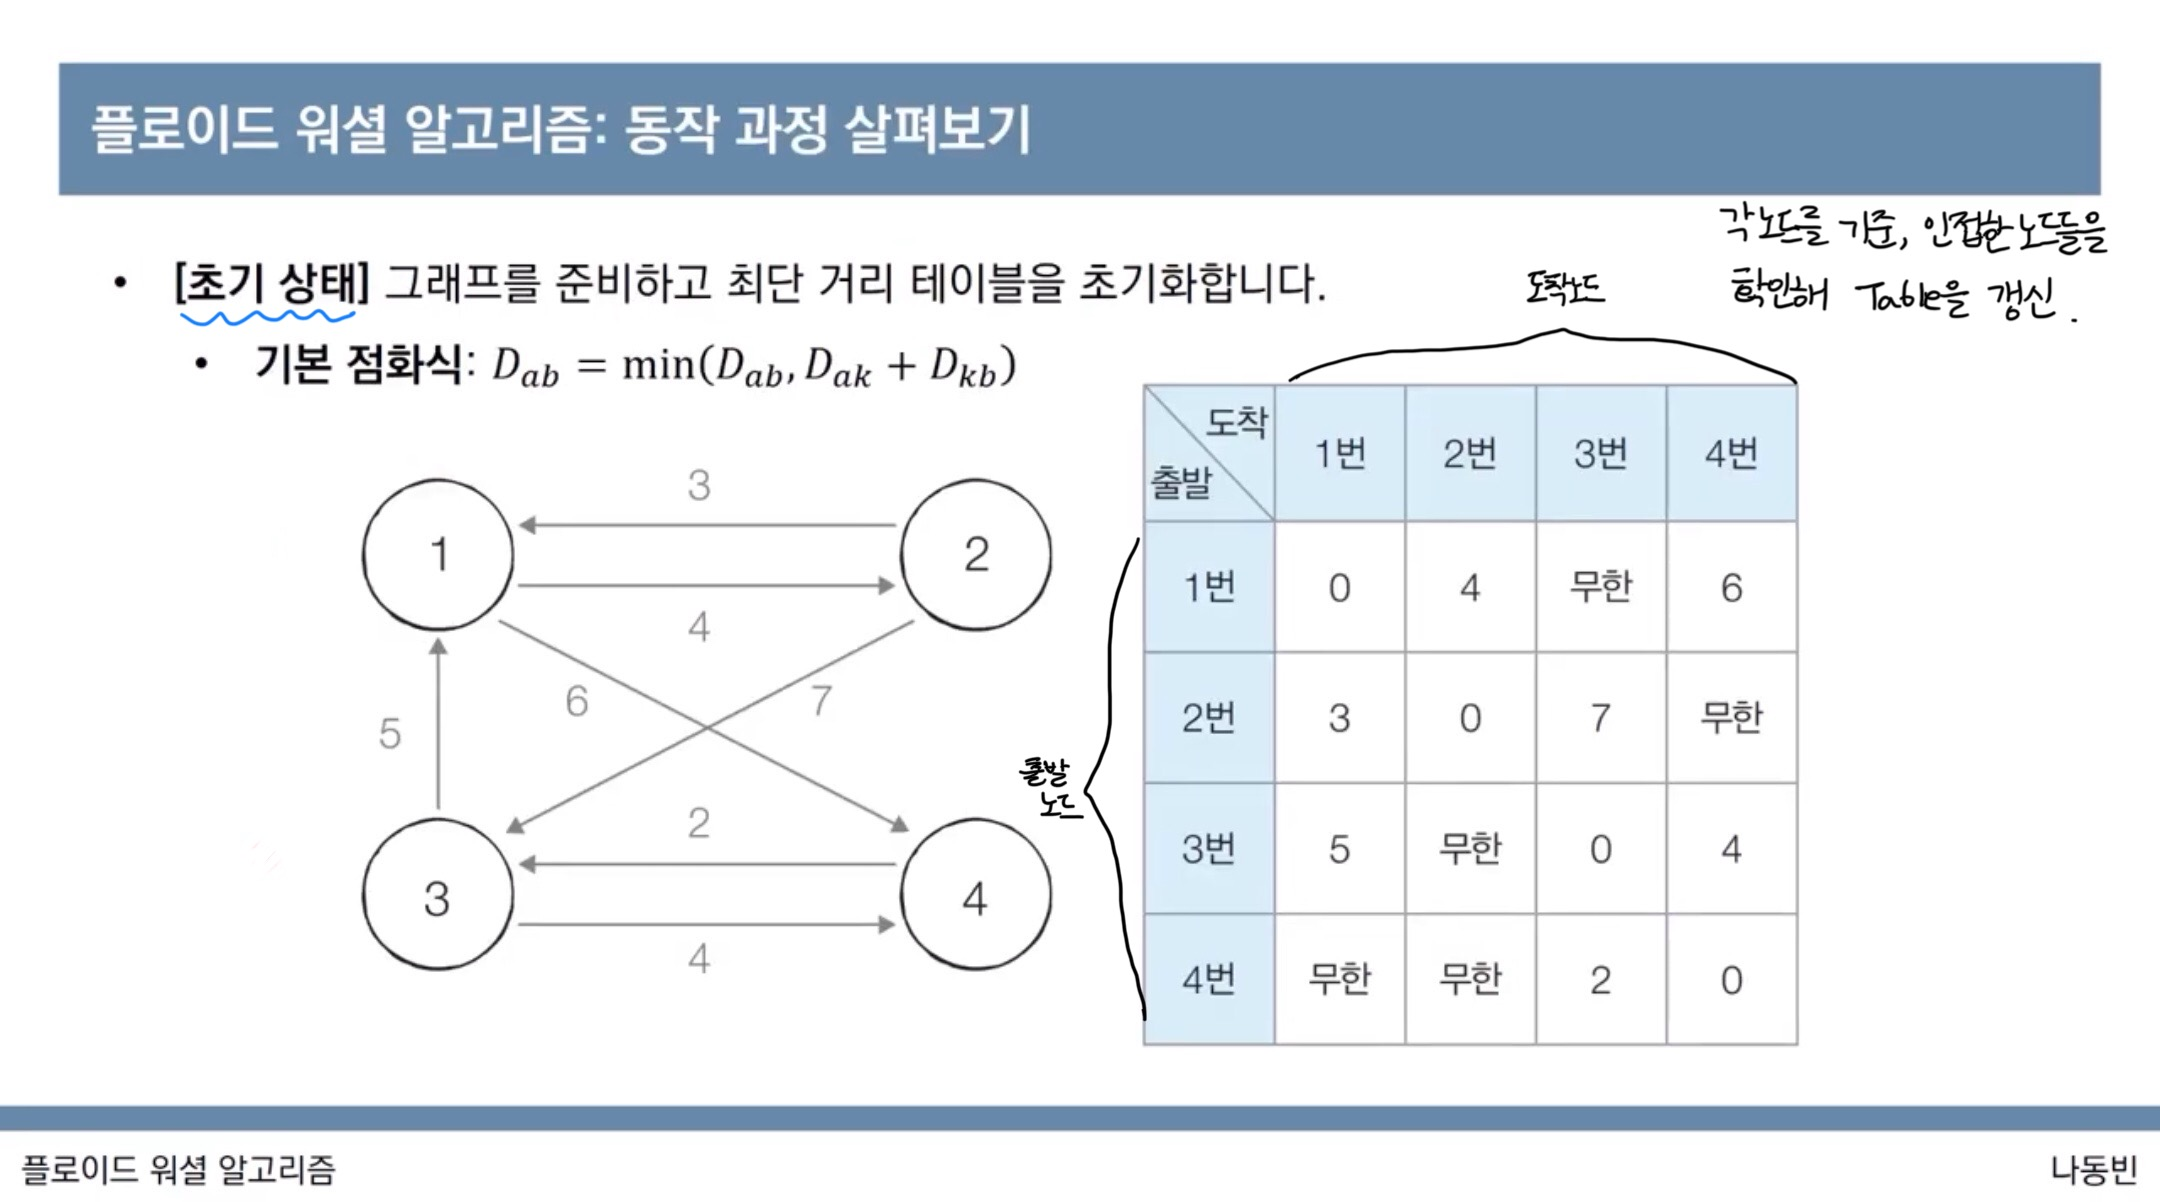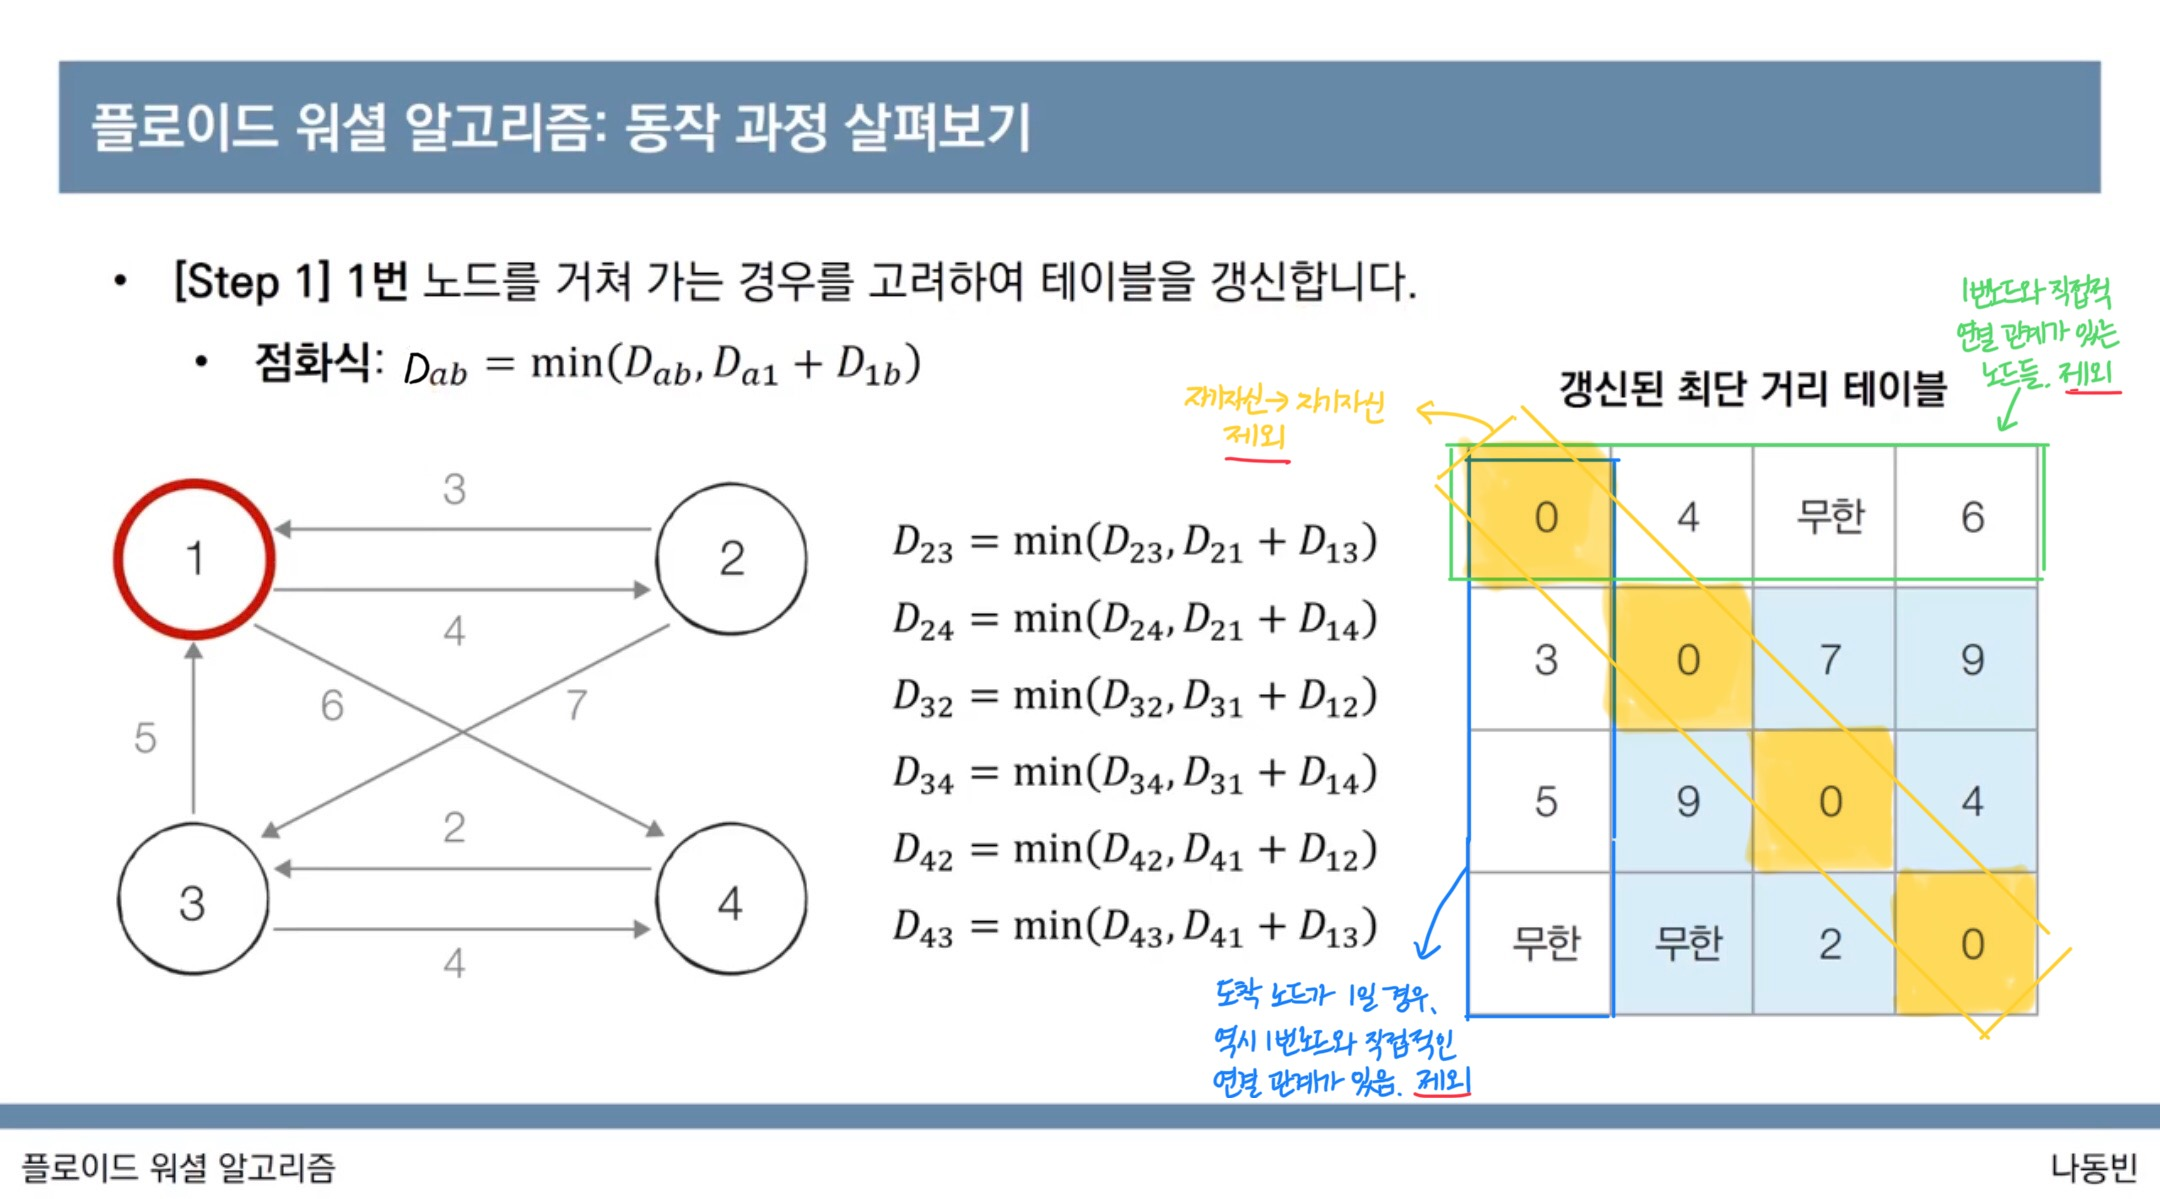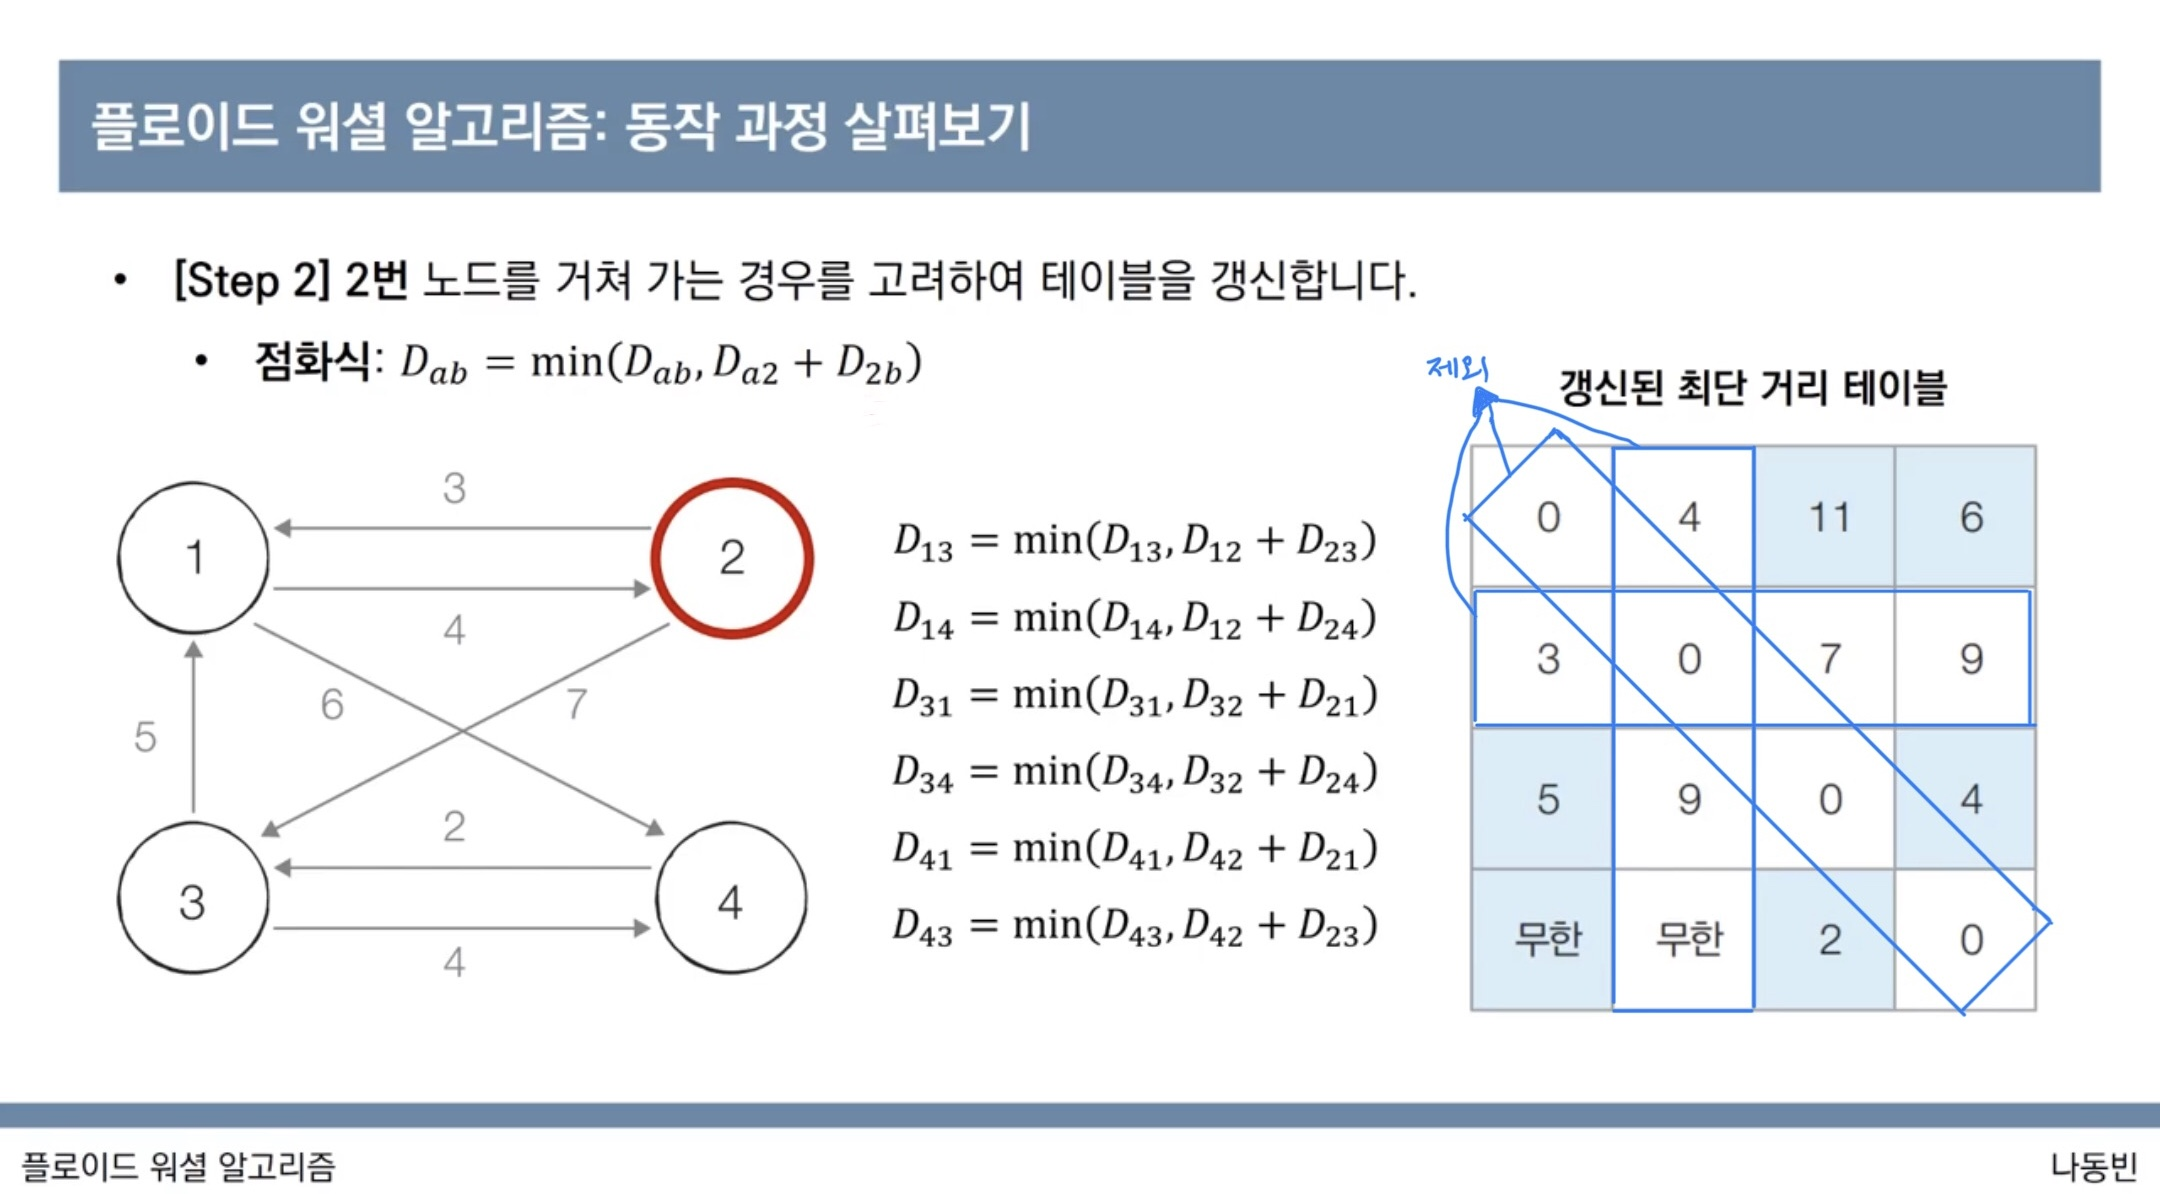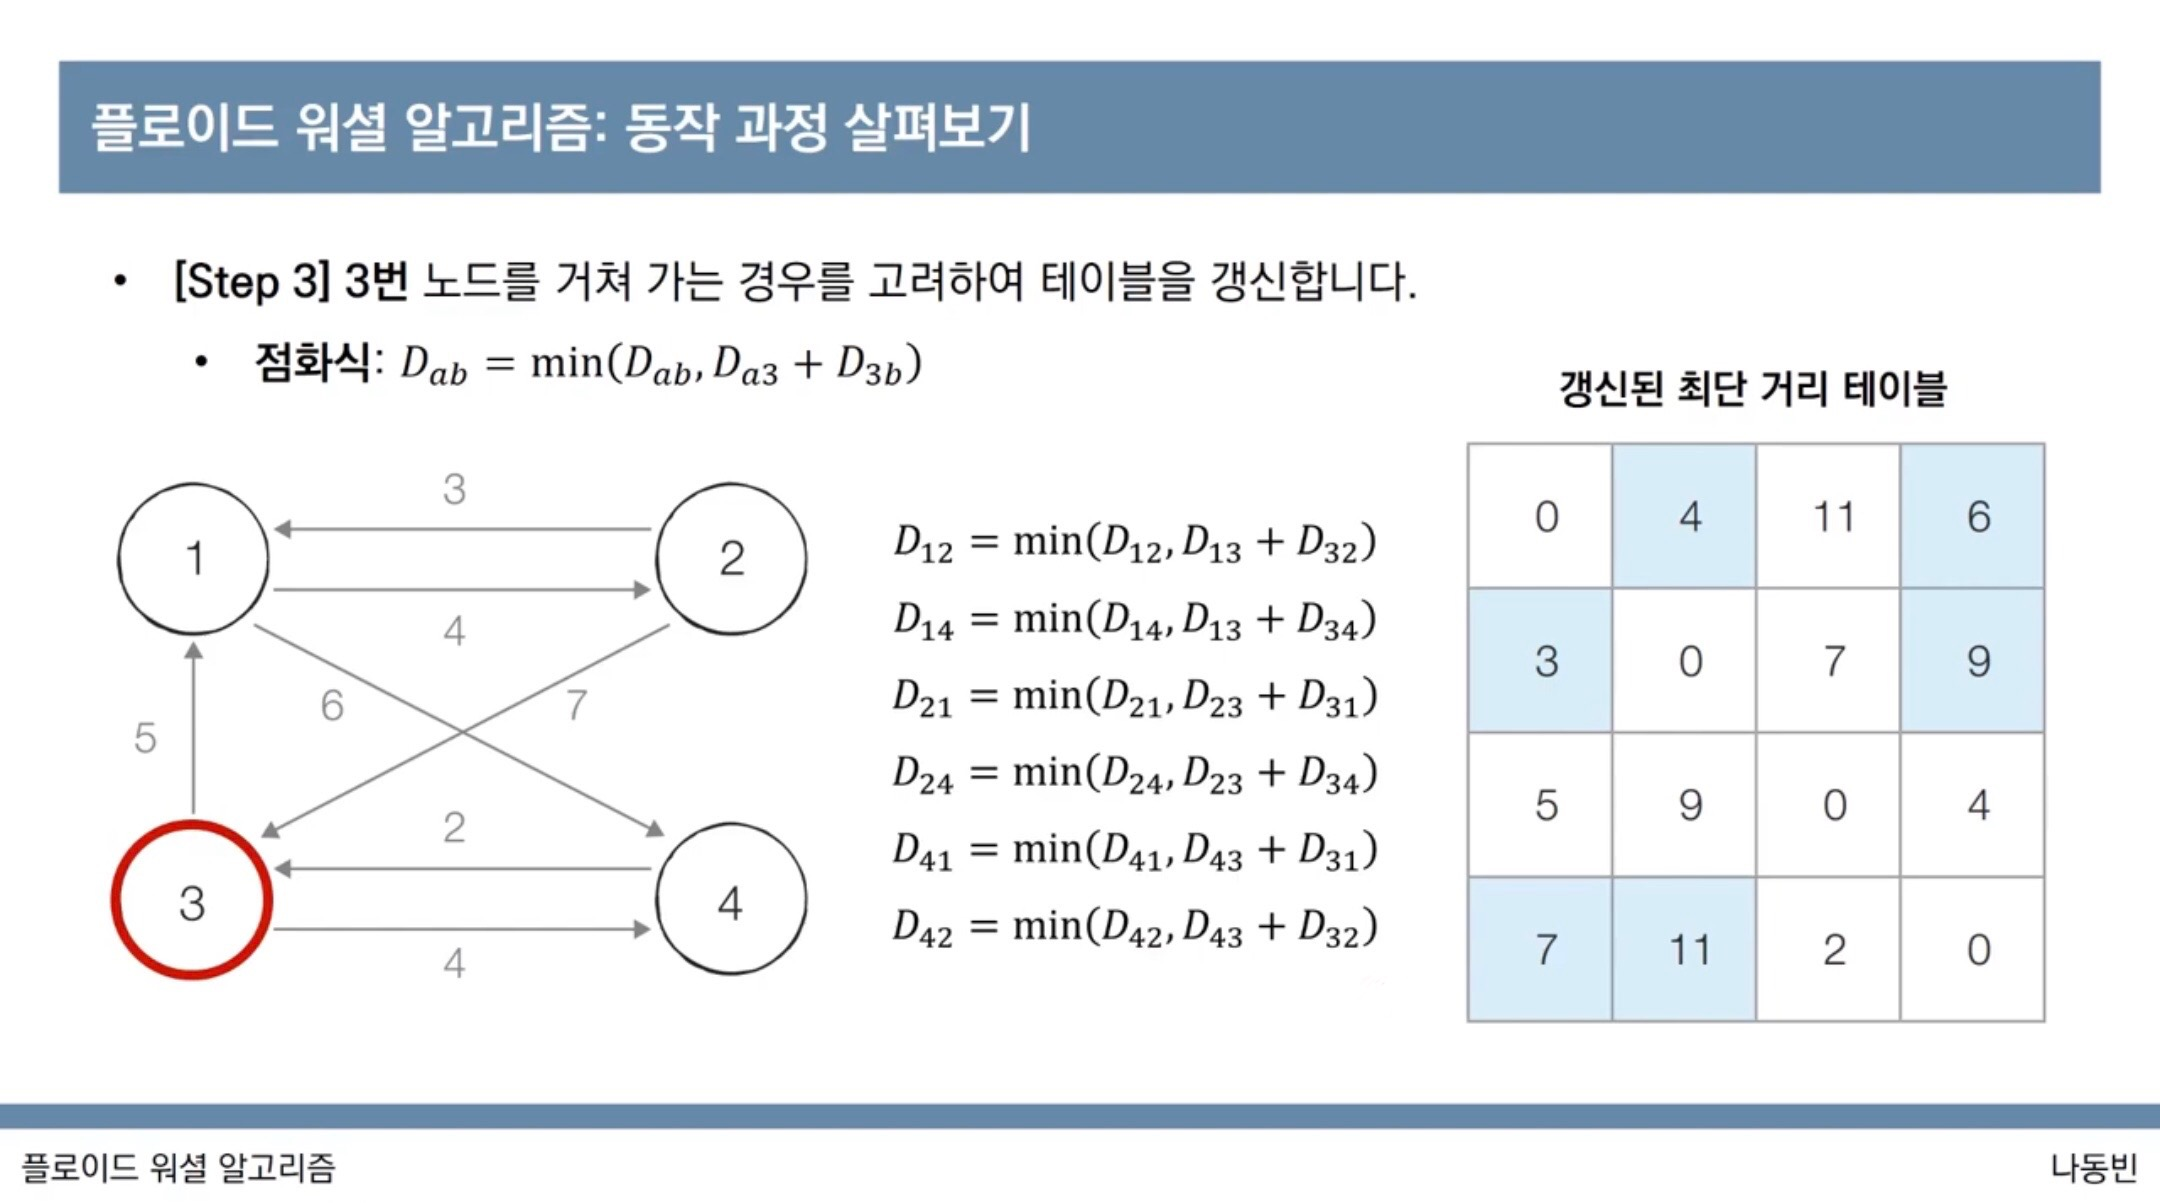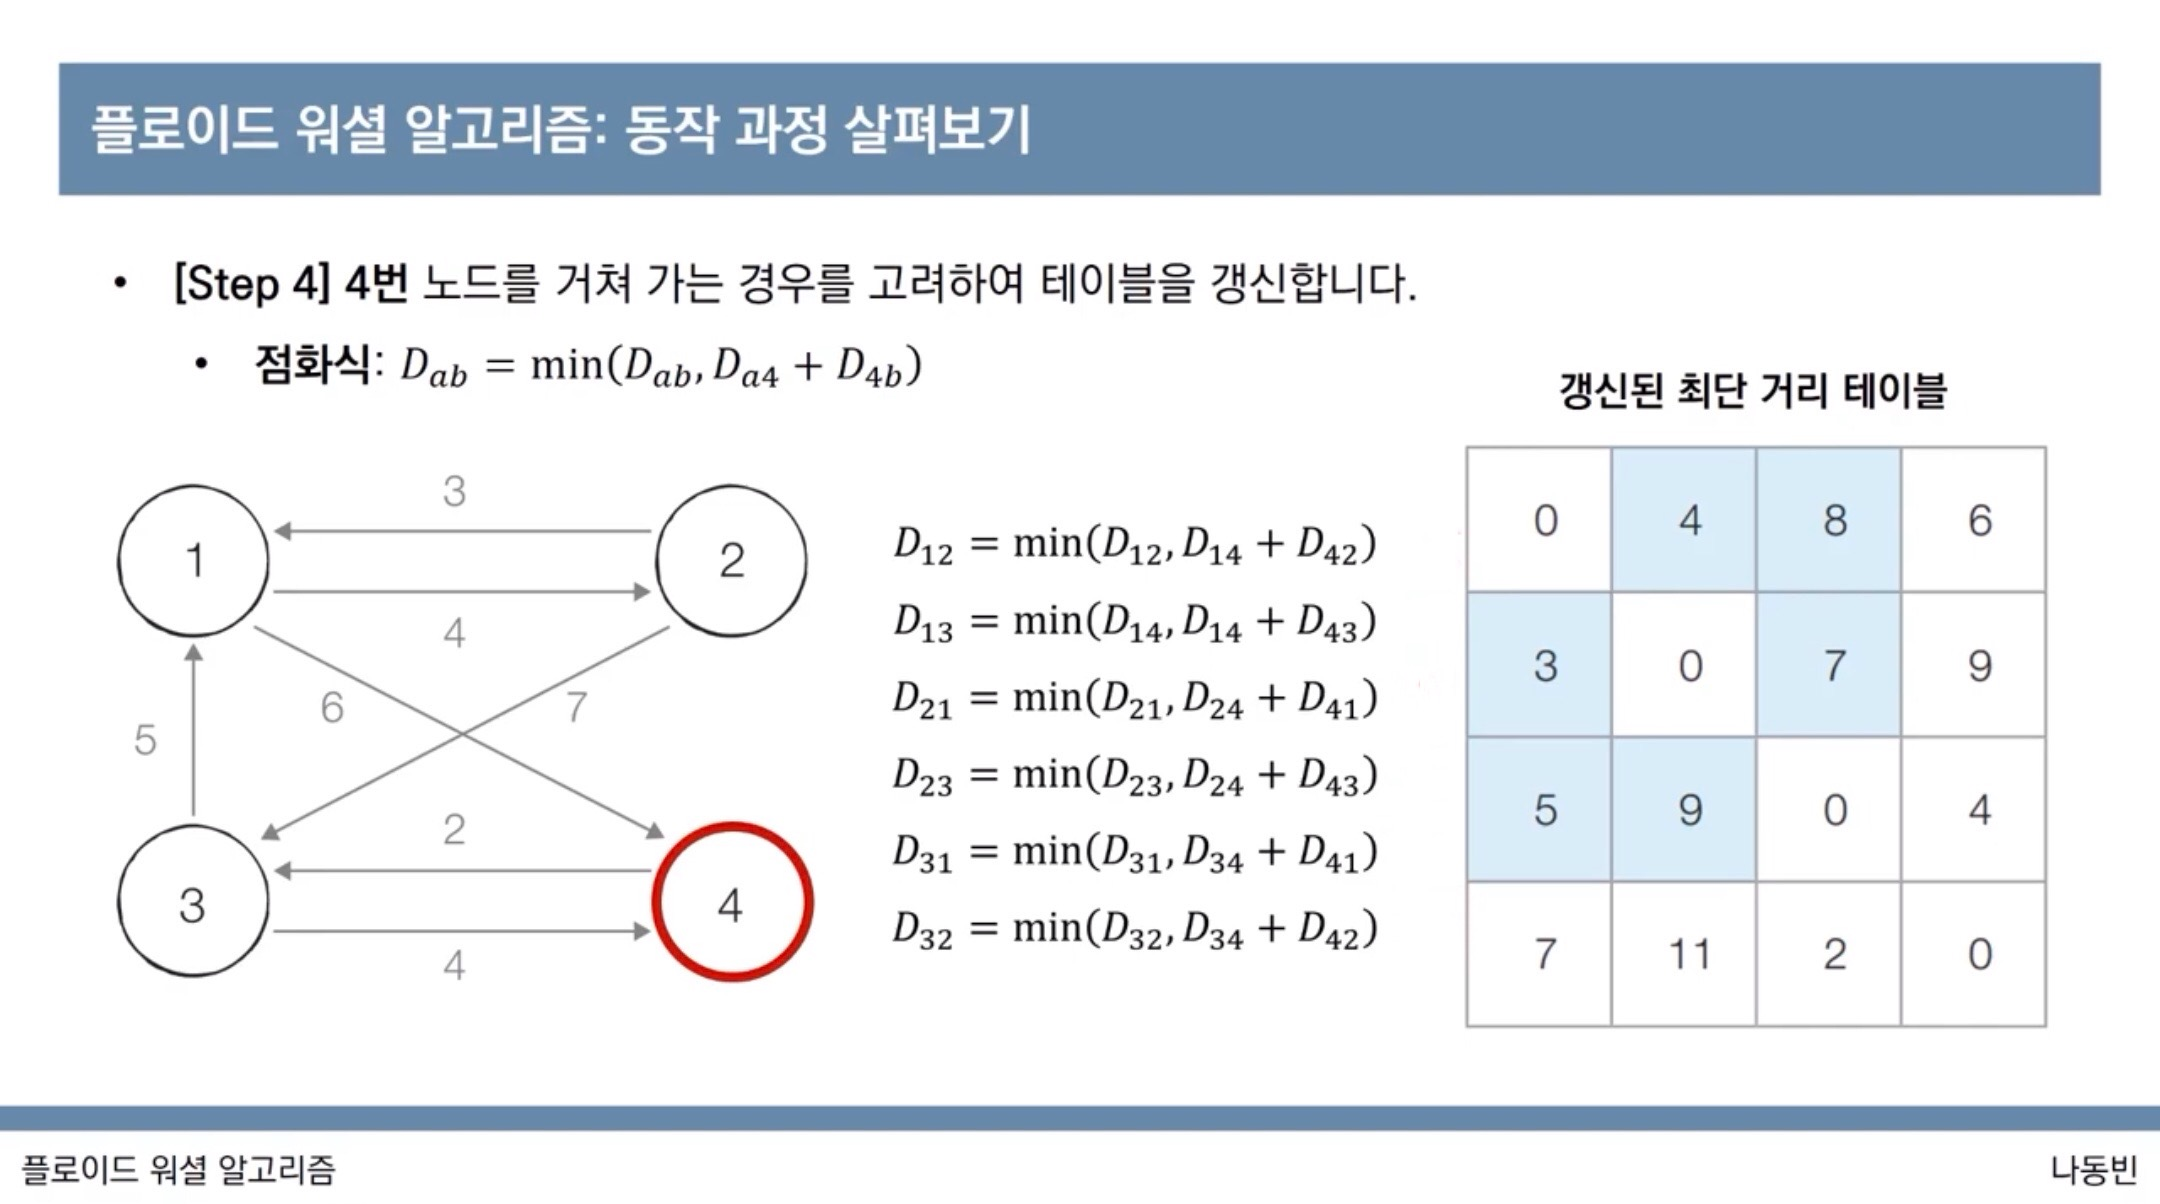

In [ ]:
INF = int(1e9)

# 노드의 개수 및 간선의 개수를 입력 받기
V = int(input())
E = int(input())

# 2차원 리스트(그래프 표현)를 만들고, 무한으로 초기화
graph = [[INF for i in range(V+1)] for j in range(V+1)]
# graph = [[INF]*(V+1) for _ in range(V+1)]

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for i in range(1, V+1):
    graph[i][i] = 0
# 각 간선에 대한 정보를 입력 받아, 그 값으로 초기화
for _ in range(E):
    start, end, dist = map(int, input().split())
    graph[start][end] = dist

# 점화식에 따라 플로이드 워셜 알고리즘 수행
for k in range(1, V+1):
    for i in range(1, V+1):
        for j in range(1, V+1):
            graph[i][j] = min(graph[i][j], graph[i][k]+graph[k][j])

# 수행된 결과를 출력
for i in range(1, V+1):
    for j in range(1, V+1):
        if graph[i][j] == INF:
            print('INFINITY!', end=" ")
        else:
            print(graph[i][j], end=" ")
    print()

4
7
1 2 4
1 4 6
2 1 3
2 3 7
3 1 5
3 4 4
4 3 2
0 4 8 6 
3 0 7 9 
5 9 0 4 
7 11 2 0 


### **🧁 성능 분석**
노드의 개수가 N개일 때, 알고리즘 상으로 N번의 단계를 수행.   
- 각 단계마다 O(N²)의 연산을 통해 현재 노드를 거쳐가는 모든 경로를 고려.

따라서, 플로이드 워셜의 알고리즘 시간 복잡도는 **O(n³)**이다!

### **🧁[문제] 미래도시**
X를 거쳐 Y로 가는 최단 거리를 구하시오.    
입력값의 범위는 100 이하.    
플로이드 워셜로 충분히 풀 수 있는 문제다.

In [7]:
INF = int(1e9)

V, E = map(int, input().split())
X, K = map(int, input().split())
graph = [[INF]*(V+1) for _ in range(V+1)]

for i in range(1, V+1):
    graph[i][i] = 0

for i in range(E):
    start, end = map(int, input().split())
    graph[start][end] =  1
    graph[end][start] =  1

for i in range(1, V+1):
    for j in range(1, V+1):
        for k in range(1, V+1):
            graph[j][k] = min(graph[j][k], graph[j][i]+graph[i][k])

distance = graph[1][X]+graph[X][K]

if distance == INF:
    print('INFINITY!', end=" ")
else:
    print(distance)

5 7
1 2
1 3
1 4
2 4
3 4
3 5
4 5
4 5
2


### **백준 문제 11404번: 플로이드**

In [11]:
INF = int(1e9)

n = int(input())
m = int(input())


graph = [[INF for i in range(n+1)] for j in range(n+1)]

for i in range(1, n+1):
    graph[i][i] = 0

for _ in range(m):
    start, end, dist = map(int, input().split())
    graph[start][end] = min(dist, graph[start][end]) # 노선이 하나가 아닐수도 있음. 최소값 넣어야 함


for k in range(1, n+1):
    for i in range(1, n+1):
        for j in range(1, n+1):
            graph[i][j] = min(graph[i][j], graph[i][k]+graph[k][j])


for i in range(1, n+1):
    for j in range(1, n+1):
        if graph[i][j] == INF:
            print(0, end=" ")
        else:
            print(graph[i][j], end=" ")
    print()

5
14
1 2 2
1 3 3
1 4 1
1 5 10
2 4 2
3 4 1
3 5 1
4 5 3
3 5 10
3 1 8
1 4 2
5 1 7
3 4 2
5 2 4
0 2 3 1 4 
12 0 15 2 5 
8 5 0 1 1 
10 7 13 0 3 
7 4 10 6 0 
